# Prequisites

In [1]:
import cv2 
import os 
#from imutils import perspective
import numpy as np 
import json
from tqdm import tqdm
import matplotlib.pyplot as plt
from imutils import perspective

# Detector Training

In [11]:
print("Number of Training images are", len(os.listdir("Total-Text")))

Number of Training images are 1255


In [12]:
# Preparing Training Annotation Text file

count = 0
flag = 1
for i in tqdm(os.listdir("Total-Text/Train")):
  img_path = os.path.join("Total-Text/Train", i)
  bounding_box_path = os.path.join("Total-Text/Annotation/groundtruth_polygonal_annotation/Train", "poly_gt_"+i.split(".")[0]+".txt")
  var = open(bounding_box_path, "r")
  var = var.readlines()
  lis = []
  for j in var:
    try:
      j = j.replace("\n", '')
      x_coordinates = j.split(",")[0].split("[")[2].split("]")[0].split(" ")
      y_coordinates = j.split(",")[1].split("[")[2].split("]")[0].split(" ")
      if(len(x_coordinates) != 4 or len(y_coordinates)!=4):
        continue
      #text = j.split(",")[3].split("[")[1].split("'")[1]
      if(j.split(" ")[-1]=="[]"):
        continue
      text = j.split(" ")[-1].split("'")[1]
      if("#" in text):
        text = "###"
      x1, x2, x3, x4 = x_coordinates[0], x_coordinates[1], x_coordinates[2], x_coordinates[3]
      y1, y2, y3, y4 = y_coordinates[0], y_coordinates[1], y_coordinates[2], y_coordinates[3] 
      dic = {}
      dic["points"] = [[x1,y1], [x2,y2], [x3,y3], [x4,y4]]  
      dic["transcription"] = str(text)
      lis.append(dic)
    except:
      flag = 0
  lis = json.dumps(lis)
  if(flag == 0):
    flag = 1
    continue
  if(lis == [] or lis=="[]"):
    continue
  with open("train.txt", "a") as ob:
    ob.write(img_path+"\t"+str(lis)+"\n")
  count = count + 1

print("Total number of Annotations created for Training are ", count)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1255/1255 [00:00<00:00, 1855.87it/s]

Total number of Annotations created for Training are  911


In [13]:
# Preparing Testing/Validation Annotation Text file

count = 0
flag = 1
for i in tqdm(os.listdir("Total-Text/Test")):
  img_path = os.path.join("Total-Text/Test", i)
  bounding_box_path = os.path.join("Total-Text/Annotation/groundtruth_polygonal_annotation/Test", "poly_gt_"+i.split(".")[0]+".txt")
  var = open(bounding_box_path, "r")
  var = var.readlines()
  lis = []
  for j in var:
    try:
      j = j.replace("\n", '')
      x_coordinates = j.split(",")[0].split("[")[2].split("]")[0].split(" ")
      y_coordinates = j.split(",")[1].split("[")[2].split("]")[0].split(" ")
      if(len(x_coordinates) != 4 or len(y_coordinates)!=4):
        continue
      #text = j.split(",")[3].split("[")[1].split("'")[1]
      if(j.split(" ")[-1]=="[]"):
        continue
      text = j.split(" ")[-1].split("'")[1]
      if("#" in text):
        text = "###"
      x1, x2, x3, x4 = x_coordinates[0], x_coordinates[1], x_coordinates[2], x_coordinates[3]
      y1, y2, y3, y4 = y_coordinates[0], y_coordinates[1], y_coordinates[2], y_coordinates[3] 
      dic = {}
      dic["points"] = [[x1,y1], [x2,y2], [x3,y3], [x4,y4]]  
      dic["transcription"] = str(text)
      lis.append(dic)
    except:
      flag = 0
  lis = json.dumps(lis)
  if(flag == 0):
    flag = 1
    continue
  if(lis == [] or lis=="[]"):
    continue
  with open("test.txt", "a") as ob:
    ob.write(img_path+"\t"+str(lis)+"\n")
  count = count + 1

print("Total number of Annotations created for Test/Eval are ", count)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 1746.91it/s]

Total number of Annotations created for Test/Eval are  212


In [17]:
!git clone https://github.com/PaddlePaddle/PaddleOCR.git

Cloning into 'PaddleOCR'...
remote: Enumerating objects: 39717, done.
remote: Counting objects: 100% (161/161), done.
remote: Compressing objects: 100% (121/121), done.
remote: Total 39717 (delta 56), reused 85 (delta 40), pack-reused 39556
Receiving objects: 100% (39717/39717), 320.87 MiB | 15.39 MiB/s, done.
Resolving deltas: 100% (27743/27743), done.


In [ ]:
%cd PaddleOCR

In [19]:
!wget -P ./pretrain_models/ https://paddleocr.bj.bcebos.com/pretrained/MobileNetV3_large_x0_5_pretrained.pdparams

--2022-08-14 15:45:39--  https://paddleocr.bj.bcebos.com/pretrained/MobileNetV3_large_x0_5_pretrained.pdparams
Resolving paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)... 103.235.46.61, 2409:8c04:1001:1002:0:ff:b001:368a
Connecting to paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)|103.235.46.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3189601 (3.0M) [application/octet-stream]
Saving to: ‘./pretrain_models/MobileNetV3_large_x0_5_pretrained.pdparams’

MobileNetV3_large_x 100%[===================>]   3.04M   587KB/s    in 8.7s    

2022-08-14 15:45:49 (360 KB/s) - ‘./pretrain_models/MobileNetV3_large_x0_5_pretrained.pdparams’ saved [3189601/3189601]



In [ ]:
#Multi-GPU Training
!python3 -m paddle.distributed.launch --gpus '0,1'  tools/train.py -c configs/det/det_mv3_db.yml -o Global.pretrained_model=./pretrain_models/MobileNetV3_large_x0_5_pretrained

In [ ]:
#Single GPU Training
!python3 tools/train.py -c configs/det/det_mv3_db.yml  \
         -o Global.pretrained_model=./pretrain_models/MobileNetV3_large_x0_5_pretrained 

# Recognizer Training

In [26]:
# Preparing the Training Annotation File and images

count = 0
flag = 1
img_counter = 0
for i in tqdm(os.listdir("Total-Text/Train")):
  img_path = os.path.join("Total-Text/Train", i)
  bounding_box_path = os.path.join("Total-Text/Annotation/groundtruth_polygonal_annotation/Train", "poly_gt_"+i.split(".")[0]+".txt")
  var = open(bounding_box_path, "r")
  var = var.readlines()
  for j in var:
    try:
      j = j.replace("\n", '')
      x_coordinates = j.split(",")[0].split("[")[2].split("]")[0].split(" ")
      y_coordinates = j.split(",")[1].split("[")[2].split("]")[0].split(" ")
      if(len(x_coordinates) != 4 or len(y_coordinates)!=4):
        continue
      #text = j.split(",")[3].split("[")[1].split("'")[1]
      if(j.split(" ")[-1]=="[]"):
        continue
      text = j.split(" ")[-1].split("'")[1]
      if("#" in text):
        text = "###"
      x1, x2, x3, x4 = x_coordinates[0], x_coordinates[1], x_coordinates[2], x_coordinates[3]
      y1, y2, y3, y4 = y_coordinates[0], y_coordinates[1], y_coordinates[2], y_coordinates[3] 
      dic = {}
      dic["points"] = [[x1,y1], [x2,y2], [x3,y3], [x4,y4]]  
      dic["transcription"] = str(text)
      lis.append(dic)
      x1,y1,x2,y2,x3,y3,x4,y4 = int(x1), int(y1), int(x2), int(y2), int(x3), int(y3), int(x4), int(x4)
      pts = np.asarray([(x1,y1), (x2,y2), (x3,y3), (x4,y4)])
      img = cv2.imread(img_path)
      warped = perspective.four_point_transform(img, pts)
      new_img_path = "crnn_train/img_"+str(img_counter)+".png"
      cv2.imwrite(new_img_path, warped)
      with open("rec_train.txt", "a") as ob:
        ob.write(new_img_path+"\t"+text+"\n")
      img_counter = img_counter + 1
    except:
      flag = 0
  if(flag == 0):
    flag = 1
    continue
  count = count + 1
print("Total number of Annotations created for Training are ", count)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1255/1255 [01:45<00:00, 11.88it/s]

Total number of Annotations created for Training are  1255


In [27]:
# Preparing the Testing/Eval Annotation File and images

count = 0
flag = 1
img_counter = 0
for i in tqdm(os.listdir("Total-Text/Test")):
  img_path = os.path.join("Total-Text/Test", i)
  bounding_box_path = os.path.join("Total-Text/Annotation/groundtruth_polygonal_annotation/Test", "poly_gt_"+i.split(".")[0]+".txt")
  var = open(bounding_box_path, "r")
  var = var.readlines()
  for j in var:
    try:
      j = j.replace("\n", '')
      x_coordinates = j.split(",")[0].split("[")[2].split("]")[0].split(" ")
      y_coordinates = j.split(",")[1].split("[")[2].split("]")[0].split(" ")
      if(len(x_coordinates) != 4 or len(y_coordinates)!=4):
        continue
      #text = j.split(",")[3].split("[")[1].split("'")[1]
      if(j.split(" ")[-1]=="[]"):
        continue
      text = j.split(" ")[-1].split("'")[1]
      if("#" in text):
        text = "###"
      x1, x2, x3, x4 = x_coordinates[0], x_coordinates[1], x_coordinates[2], x_coordinates[3]
      y1, y2, y3, y4 = y_coordinates[0], y_coordinates[1], y_coordinates[2], y_coordinates[3] 
      dic = {}
      dic["points"] = [[x1,y1], [x2,y2], [x3,y3], [x4,y4]]  
      dic["transcription"] = str(text)
      lis.append(dic)
      x1,y1,x2,y2,x3,y3,x4,y4 = int(x1), int(y1), int(x2), int(y2), int(x3), int(y3), int(x4), int(x4)
      pts = np.asarray([(x1,y1), (x2,y2), (x3,y3), (x4,y4)])
      img = cv2.imread(img_path)
      warped = perspective.four_point_transform(img, pts)
      new_img_path = "crnn_test/img_"+str(img_counter)+".png"
      cv2.imwrite(new_img_path, warped)
      with open("rec_test.txt", "a") as ob:
        ob.write(new_img_path+"\t"+text+"\n")
      img_counter = img_counter + 1
    except:
      flag = 0
  if(flag == 0):
    flag = 1
    continue
  count = count + 1
print("Total number of Annotations created for Test/Eval are ", count)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [00:38<00:00,  7.81it/s]

Total number of Annotations created for Test/Eval are  297


In [ ]:
%cd PaddleOCR

In [ ]:
# Download the pre-trained model of en_PP-OCRv3
!wget -P ./pretrain_models/ https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_rec_train.tar
# Decompress model parameters
%cd pretrain_models
!tar -xf en_PP-OCRv3_rec_train.tar && rm -rf en_PP-OCRv3_rec_train.tar
%cd ..

In [ ]:
!python3 -m paddle.distributed.launch --gpus '0,1'  tools/train.py -c configs/rec/PP-OCRv3/en_PP-OCRv3_rec.yml -o Global.pretrained_model=en_PP-OCRv3_rec_train/best_accuracy

# Converting Trained Weights to Inference Weights

In [ ]:
%cd PaddleOCR

In [4]:
#Conversion of Recognizer Trained weights to Inference

!python3 tools/export_model.py -c configs/rec/PP-OCRv3/en_PP-OCRv3_rec.yml -o Global.pretrained_model=output/v3_en_mobile/best_accuracy  Global.save_inference_dir=./inference/en_PP-OCRv3_rec/

W0821 04:11:47.627471 10865 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 7.5, Driver API Version: 11.4, Runtime API Version: 11.2
W0821 04:11:47.658488 10865 gpu_resources.cc:91] device: 0, cuDNN Version: 8.2.
[2022/08/21 04:11:50] ppocr INFO: load pretrain successful from output/v3_en_mobile/best_accuracy
[2022/08/21 04:11:52] ppocr INFO: inference model is saved to ./inference/en_PP-OCRv3_rec/inference


In [6]:
#conversion of Detection Trained Weights to Inference

!python3 tools/export_model.py -c configs/det/det_mv3_db.yml -o Global.pretrained_model="./output/db_mv3/best_accuracy" Global.save_inference_dir="./output/det_db_inference/"

W0821 04:14:38.911141 14130 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 7.5, Driver API Version: 11.4, Runtime API Version: 11.2
W0821 04:14:38.917029 14130 gpu_resources.cc:91] device: 0, cuDNN Version: 8.2.
[2022/08/21 04:14:41] ppocr INFO: load pretrain successful from ./output/db_mv3/best_accuracy
[2022/08/21 04:14:44] ppocr INFO: inference model is saved to ./output/det_db_inference/inference


# Inference using Custom Weights in PyPi Version

In [17]:
from paddleocr import PaddleOCR,draw_ocr
from PIL import Image

In [71]:
#Loading the detector and ocr with the previously trained weights
custom_ocr = PaddleOCR(use_angle_cls=True,
                rec_model_dir='PaddleOCR/inference/en_PP-OCRv3_rec',
                det_model_dir='PaddleOCR/output/det_db_inference', 
                rec_char_dict_path='ppocr/utils/en_dict.txt',
                use_gpu=True,
                show_log=False)

In [ ]:
ocr = PaddleOCR(use_angle_cls=True, lang="en")

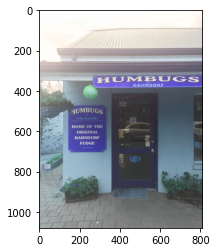

In [26]:
img_path = "img1006.jpg"
img = cv2.imread(img_path)
plt.imshow(img)

In [73]:
result = custom_ocr.ocr(img)

In [66]:
# draw result
image = Image.open(img_path).convert('RGB')
boxes = [line[0] for line in result]
txts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]
im_show = draw_ocr(image, boxes, txts, scores, font_path='doc/fonts/simfang.ttf')
im_show = Image.fromarray(im_show)
im_show.save('result.jpg')

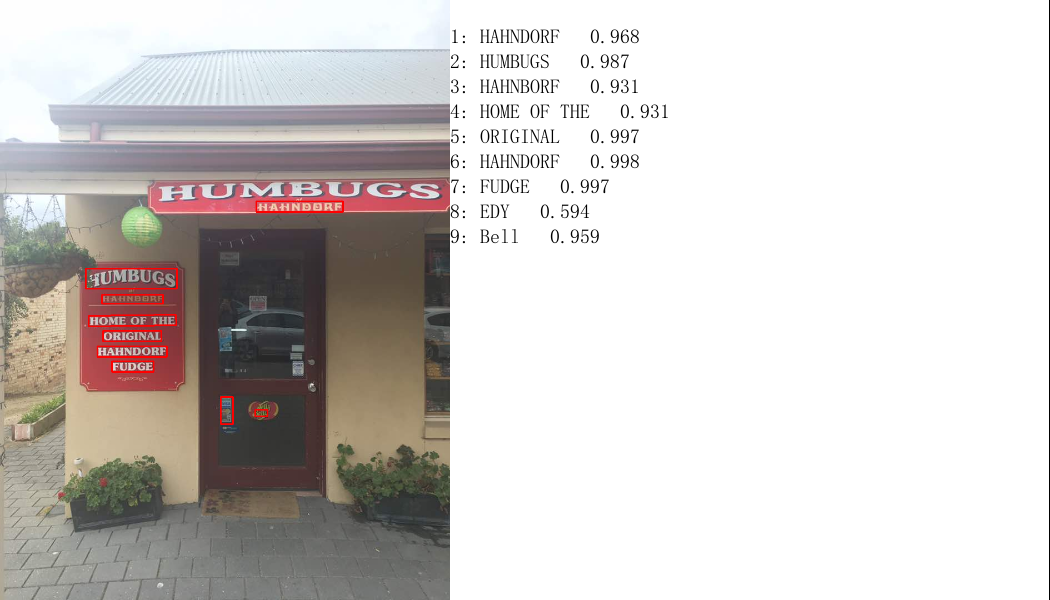

In [67]:
im_show